In [ ]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('crop_production.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.describe()



,Crop_Year,Area,Production
count,220383.000000,2.203830e+05,2.167830e+05
mean,2005.604793,1.170116e+04,6.383420e+05
std,4.936072,3.781905e+04,1.803895e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.400000e+01,9.300000e+01
50%,2006.000000,6.000000e+02,7.500000e+02
75%,2010.000000,4.490000e+03,7.081485e+03
max,2015.000000,1.020181e+06,1.250800e+09


In [ ]:
len(df['State_Name'].unique())

31

In [ ]:
len(df['Crop'].unique())

125

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           1
Season              1
Crop                1
Area                1
Production       3601
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df[df['Production'] !=0]

**Null Value Removed**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213266 entries, 0 to 220382
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     213266 non-null  object 
 1   District_Name  213266 non-null  object 
 2   Crop_Year      213266 non-null  float64
 3   Season         213266 non-null  object 
 4   Crop           213266 non-null  object 
 5   Area           213266 non-null  float64
 6   Production     213266 non-null  float64
dtypes: float64(3), object(4)
memory usage: 13.0+ MB


In [ ]:
df['Crop_Year'].unique()

array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2010., 1997.,
       1998., 1999., 2007., 2008., 2009., 2011., 2012., 2013., 2014.,
       2015.])

**The Data has been collected from 1997-2015**

In [ ]:
df['State_Name'].unique() 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh'], dtype=object)

In [ ]:
df['District_Name'].nunique()

591

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df['Production'].sort_values(ascending = False)

178273   1250800000.00
178331   1212000000.00
100654   1125000000.00
100612   1063000000.00
100149   1059000000.00
              ...     
122293            0.01
110302            0.01
122317            0.01
115238            0.01
119440            0.01
Name: Production, Length: 213266, dtype: float64

In [ ]:
df.loc[178273]

State_Name         Tamil Nadu
District_Name      COIMBATORE
Crop_Year             2011.00
Season            Whole Year 
Crop                 Coconut 
Area                 82704.00
Production      1250800000.00
Name: 178273, dtype: object

In [ ]:
df[df['Area'] == 82704.00]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
178273,Tamil Nadu,COIMBATORE,2011.00,Whole Year,Coconut,82704.00,1250800000.00


In [ ]:
no_of_diff_crops = df['Crop'].nunique()
types_of_crops = df['Crop'].unique()

print('There are {} different types of crops'.format(no_of_diff_crops))
print('------------------------------------')
print('They different types of crops are :-',types_of_crops)

There are 105 different types of crops
------------------------------------
They different types of crops are :- ['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Beans & Mutter(Vegetable)' 'Bhindi' 'Brinjal'
 'Citrus Fruit' 'Grapes' 'Mango' 'Orange' 'Other Fresh Fruits' 'Papaya'
 'Pome Fruit' 'Tomato' 'Soyabean' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Niger seed'
 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total' 'Jute'
 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannham

In [ ]:
df['Season'].value_counts()

Kharif         84337
Rabi           56909
Whole Year     49925
Summer         12223
Winter          5592
Autumn          4280
Name: Season, dtype: int64

**Creating Linear regression model**

In [ ]:
crop_data = pd.get_dummies(data=df)

In [ ]:
crop_data.head()

,Crop_Year,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000.00,1254.00,2000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000.00,2.00,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000.00,102.00,321.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000.00,176.00,641.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000.00,720.00,165.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Dividing data into Training and testing data**


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = crop_data.drop('Production',axis=1)
X.head()

,Crop_Year,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000.00,1254.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000.00,2.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000.00,102.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000.00,176.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000.00,720.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = crop_data['Production']
y.head()

0   2000.00
1      1.00
2    321.00
3    641.00
4    165.00
Name: Production, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:

X_test.shape

(70378, 735)

In [ ]:
y_test.shape

(70378,)

**Creating model**


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
crop_model = LinearRegression()

In [ ]:
crop_model.fit(X_train,y_train)

LinearRegression()

**Prediction**

In [ ]:
crop_predictions = crop_model.predict(X_test)
crop_predictions

array([  591668.81926186, -1224399.18087533,  -528237.48815455, ...,
         -79121.86366799,  -152631.26284787,   162578.32881211])

In [ ]:
crop_model.coef_

array([ 1.67209888e+04,  3.01671735e+01, -1.05211224e+06, -2.37083600e+05,
        5.27593751e+04, -1.55761425e+06, -3.66847551e+05, -2.39469572e+04,
       -4.59894483e+05, -1.13814216e+06, -7.92059105e+05, -8.06310879e+05,
       -8.11495145e+05, -1.28954377e+05, -5.27237219e+05, -1.48069022e+04,
       -2.81353402e+06,  2.27441786e+07, -7.26824712e+05, -1.09895549e+06,
        2.98393113e+05,  4.48174365e+05, -4.10915756e+05, -4.07108794e+05,
       -1.87648915e+04, -4.84516920e+06, -1.14784493e+06, -1.07183245e+06,
       -1.86512439e+05, -6.25307352e+05, -1.09961087e+06, -5.49681437e+05,
       -6.24938292e+05,  2.75326088e+05, -9.56888971e+04, -2.33741555e+05,
       -8.60907578e+04, -4.38374133e+05, -3.21485556e+05,  2.17963959e+05,
       -2.47919780e+05, -3.57791257e+06, -4.92131633e+05,  1.77491272e+05,
       -5.39601450e+05, -9.38712146e+04,  9.81169853e+04, -2.90393309e+05,
       -4.36760420e+05, -3.47607907e+05, -3.82487514e+05, -3.16717845e+05,
        2.14387973e+04,  

In [ ]:
crop_model.intercept_

-33686294.63228672

In [ ]:
predicted_crop_val = pd.DataFrame({'Actual':y_test,'Predicted':crop_predictions})
predicted_crop_val

,Actual,Predicted
191452,480.00,591668.82
172763,290.00,-1224399.18
81954,26248.00,-528237.49
79750,6.00,-1579489.85
193433,20.00,-1355248.90
...,...,...
216969,5.00,-836851.13
1823,2500.00,9175562.30
121894,65.00,-79121.86
200451,2.00,-152631.26


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df['Production'].mean()

648868.9434560126

In [ ]:
crop_predictions.mean()

567688.9612009758

In [ ]:
mean_absolute_error(y_test,crop_predictions)

2199779.5972323604

In [ ]:
mean_squared_error(y_test,crop_predictions)

301754861682964.25

In [ ]:
np.sqrt(mean_squared_error(y_test,crop_predictions))

17371092.702618457

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_test,crop_predictions)

7178002.241730147

In [ ]:
test_residuals = y_test - crop_predictions

In [ ]:
test_residuals

191452    -591188.82
172763    1224689.18
81954      554485.49
79750     1579495.85
193433    1355268.90
             ...    
216969     836856.13
1823     -9173062.30
121894      79186.86
200451     152633.26
107319    -162418.33
Name: Production, Length: 70378, dtype: float64

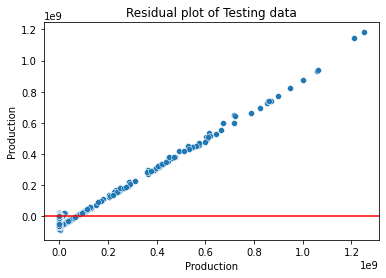

In [ ]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')
plt.title('Residual plot of Testing data');

In [ ]:
r = r2_score(y_test,crop_predictions)
print("R2score when we predict using Linear Regression is ",r)

R2score when we predict using Linear Regression is  0.18493399566622137


**Results of training data**


In [ ]:
train_set_predictions = crop_model.predict(X_train)
train_set_predictions

array([-3259622.32998938,  -530500.35001556, -1254656.07860044, ...,
         587913.93084943,   474760.02963475,  1698161.198421  ])

In [ ]:
train_set_predictions.mean()

632100.1644935672

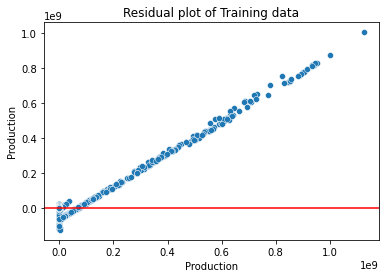

In [ ]:
sns.scatterplot(x=y_train,y=y_train-train_set_predictions)
plt.axhline(y=0,color='red')
plt.title('Residual plot of Training data');

In [ ]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(y_train,train_set_predictions)

7092939.504862983

In [ ]:
Crop_data2 = df.drop(['District_Name'],axis=1)

In [ ]:
Crop_data2.head()

,State_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000.00,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,2000.00,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,2000.00,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,2000.00,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,2000.00,Whole Year,Cashewnut,720.00,165.00


In [ ]:
crop_data2_ac = pd.get_dummies(data=Crop_data2)
crop_data2_ac.head()

,Crop_Year,Area,Production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000.00,1254.00,2000.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000.00,2.00,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000.00,102.00,321.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000.00,176.00,641.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000.00,720.00,165.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Dividing data into Training and Tesing Data**


In [ ]:
X2 = crop_data2_ac.drop('Production',axis=1)
X2.head()

,Crop_Year,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,2000.00,1254.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000.00,2.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000.00,102.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000.00,176.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000.00,720.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y2 = crop_data2_ac['Production']
y2.head()

0   2000.00
1      1.00
2    321.00
3    641.00
4    165.00
Name: Production, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
crop_model2 = LinearRegression()
crop_model2.fit(X2_train,y2_train)

LinearRegression()

In [ ]:
#Prediction
crop2_predictions = crop_model2.predict(X2_test)
crop2_predictions

array([ -27567.15607489, -242975.82827755,  193874.62415348, ...,
       -224034.83310432, -455078.28891501,  120365.51545634])

In [ ]:
crop_model2.coef_

array([ 1.66590802e+04,  2.96079446e+01, -1.03622793e+06, -2.78134675e+05,
        1.47928246e+05, -1.60208629e+06, -4.06796537e+05,  1.75291490e+04,
       -5.99737439e+05, -2.22780505e+06, -1.22475575e+06, -7.47242627e+05,
       -7.69837064e+05, -4.46193350e+05, -4.91621014e+05,  7.40470556e+04,
       -2.10520691e+06,  2.33295204e+07, -6.55874689e+05, -1.01805782e+06,
        3.49140485e+05,  4.85958426e+05, -4.02295781e+05, -3.24549190e+05,
        2.12893788e+04, -4.53133471e+06, -1.14790319e+06, -9.41997483e+05,
       -1.42979607e+05, -6.78000191e+05, -1.35372204e+06, -5.03057760e+05,
       -7.89996083e+05, -4.94763019e+05,  5.38142713e+05,  6.45413459e+05,
        6.74866984e+05, -3.05316110e+05, -1.05834403e+06,  2.62245205e+06,
       -2.93330986e+06,  3.83022700e+05,  2.66524610e+06, -1.09549605e+05,
       -3.49567554e+05,  3.33211384e+05,  5.16960977e+03,  1.76549989e+06,
        1.21386827e+06,  3.61772637e+05, -4.83861278e+06,  3.63019104e+05,
        3.61224606e+05,  

In [ ]:
crop_model.intercept_

-33686294.63228672

In [ ]:
predicted_crop_val2 = pd.DataFrame({'Actual':y2_test,'Predicted':crop2_predictions})
predicted_crop_val2

,Actual,Predicted
191452,480.00,-27567.16
172763,290.00,-242975.83
81954,26248.00,193874.62
79750,6.00,-1687013.88
193433,20.00,-574012.99
...,...,...
216969,5.00,-659197.56
1823,2500.00,192876.83
121894,65.00,-224034.83
200451,2.00,-455078.29


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df['Production'].mean()

648868.9434560126

In [ ]:
crop2_predictions.mean()

556512.1489000395

In [ ]:
mean_absolute_error(y_test,crop2_predictions)

2077972.4729596092

In [ ]:
mean_squared_error(y_test,crop2_predictions)

306965695608223.44

In [ ]:
np.sqrt(mean_squared_error(y_test,crop2_predictions))

17520436.51306164

In [ ]:
r2_score(y_test,crop2_predictions)

0.1708590821320356

In [ ]:
test2_residuals = y2_test - crop2_predictions

In [ ]:
test2_residuals

191452     28047.16
172763    243265.83
81954    -167626.62
79750    1687019.88
193433    574032.99
            ...    
216969    659202.56
1823     -190376.83
121894    224099.83
200451    455080.29
107319   -120205.52
Name: Production, Length: 70378, dtype: float64

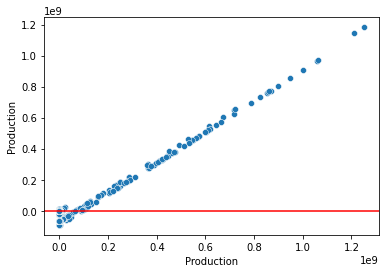

In [ ]:
sns.scatterplot(x=y2_test,y=test2_residuals)
plt.axhline(y=0,color='red')